<a href="https://colab.research.google.com/github/DaniilSysoev/opisis_sem_3/blob/main/%D0%9E%D0%BF%D0%B8%D1%81%D0%B8%D1%81_%D1%81%D0%B5%D0%BC_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Обратное дискретное преобразование Фурье. Быстрое преобразование Фурье.</h1>

<h2>Введем необходимые библиотеки для работы</h2>

In [ ]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import time

<h2>Напишем функцию сигнала, над которым мы будем производить прямое и обратное преобразование Фурье, а также быстрое, для сравнения.</h2>

In [ ]:
def signal(x):
  return np.sin(2.0*np.pi*x)+2.0*np.sin(4.0*np.pi*x)+0.5*np.sin(6.0*np.pi*x)

<h2>Введем функции прямого и обратного дискретного преобразования Фурье</h2>

<h3>Прямое дискретное преобразование Фурье</h3>

In [ ]:
def dft(data):
  n = len(data)
  spectr = [0.0+0.0j]*n
  coef = 2.0/n
  arg = np.pi*coef
  for i in range(n):
    for j in range(n):
      spectr[i] += data[j]*(np.cos(arg*i*j)-np.sin(arg*i*j)*1j)
  return np.array(spectr, dtype=complex)

<h3>Обратное дискретное преобразование Фурье</h3>

In [ ]:
def idft(data):
  n = len(data)
  signal = [0.0+0.0j]*n
  coef = 2.0/n
  arg = np.pi*coef
  for i in range(n):
    for j in range(n):
      signal[i] += data[j]*(np.cos(arg*i*(j+0))-np.sin(arg*i*(j+0))*1j)
  return np.array(signal, dtype=complex)/n

<h2>Введем необходимые величины для сигнала</h2>
<h3>Входные данные:</h3>
<h4>Опорная частота сигнала: 5<br>Временной интервал: 4<br>Число временных отсчетов: 1000</h4>

In [ ]:
f = float(input("Опорная частота сигнала "))
T = float(input('Временной интервал '))
n = int(input('Число временных отсчетов '))

Опорная частота сигнала 5
Временной интервал 4
Число временных отсчетов 1000


<h2>Введем временную шкалу и построим функцию сигнала по ней</h2>

In [ ]:
t = np.linspace(0, T, n)
u = []
for i in range(n):
  u.append(signal(f*t[i]))

<h2>Проведем рассчет прямого дискретного и быстрого преобразования Фурье и произведем замер времени выполнения</h2>

<h3>Время вычисления дискретного преобразования Фурье</h3>

In [ ]:
print('Рассчет ДПФ...')
start_time_dft = time.time()
spec1 = dft(u)
stop_time_dft = time.time() - start_time_dft
print('Время рассчета ДПФ: '+str(stop_time_dft))

Рассчет ДПФ...
Время рассчета ДПФ: 8.893914699554443


<h3>Время вычисления быстрого преобразования Фурье</h3>

In [ ]:
print('Рассчет БПФ...')
start_time_fft = time.time()
spec2 = np.fft.fft(u)
stop_time_fft = time.time() - start_time_fft
print('Время рассчета БПФ: '+str(stop_time_fft))

Рассчет БПФ...
Время рассчета БПФ: 0.0003771781921386719


<h3>Оценим скорость рассчета спектра ДПФ и БПФ</h3>

In [ ]:
if stop_time_dft > stop_time_fft:
  print(f"БПФ выполняется быстрее ДПФ в {stop_time_dft/stop_time_fft} раз")
else:
  print(f"ДПФ выполняется быстрее БПФ в {stop_time_fft/stop_time_dft} раз")

БПФ выполняется быстрее ДПФ в 23580.14032869785 раз


<h2>Выполним обратное дискретное и быстрое преобразование Фурье</h2>

In [ ]:
sig_dft = idft(spec1)
sig_fft = np.fft.ifft(spec2)

<h2>Введем частотную шкалу и построим модели сигналов до преобразований и после</h2>

In [ ]:
freq = np.fft.fftfreq(n, T/n)

<h3>Сигнал до преобразования</h3>

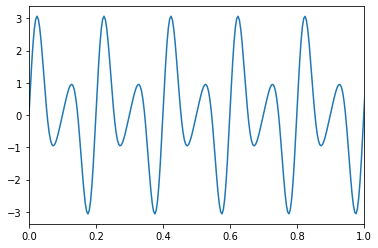

In [ ]:
from importlib import reload
reload(plt)
plt.xlim(0, 1)
plt.plot(t, u)

<h3>Спектр дискретного и быстрого преобразования Фурье</h3>

(0.0, 20.0)

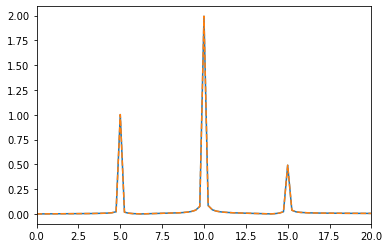

In [58]:
plt.plot(freq[0:n//2], (np.hypot(spec1.real, spec1.imag)/n*2.0)[0:n//2], label='ДПФ')
plt.plot(freq[0:n//2], (np.hypot(spec2.real, spec2.imag)/n*2.0)[0:n//2], '--', label='БПФ')
plt.xlim(0, 20)

<h3>Построим модель сигнала после обратного дискретного преобразования Фурье</h3>

(0.0, 1.0)

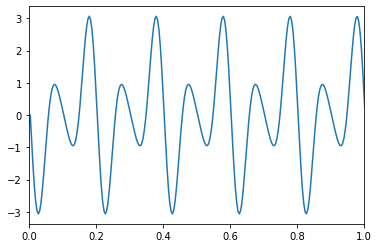

In [60]:
plt.plot(t, sig_dft.real, label='ОДПФ')
plt.xlim(0, 1)

<h3>Построим модель сигнала после обратного быстрого преобразования Фурье</h3>

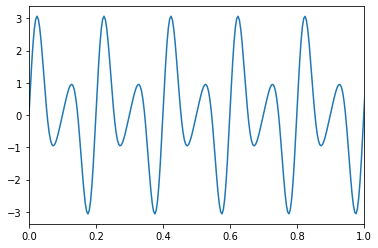

In [62]:
plt.xlim(0, 1)
plt.plot(t, sig_fft.real, label='ОБПФ')